In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('../data/all_data.csv')

#### General information

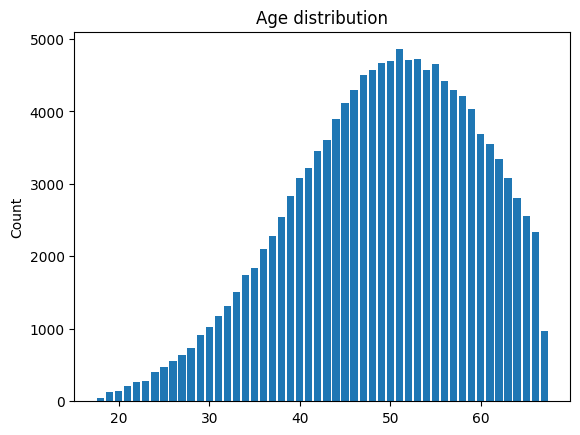

In [13]:
age = data['persoon_leeftijd_bij_onderzoek']
counts = age.value_counts()

plt.bar(counts.index, counts.values)

# Add labels and title
plt.ylabel('Count')
plt.title('Age distribution')

plt.show()

In [62]:
data = counts

age_bins = [0, 25, 45, 65]
age_labels = ['18-25', '26-45', '46-65']

age_groups = pd.cut(data.index, bins=age_bins, labels=age_labels, right=False)

# Group by the age group and sum the counts
grouped = data.groupby(age_groups, observed=False).sum()
relative_freq =  grouped / np.sum(counts.values) * 100

print(relative_freq)

real_distr = np.array([92793, 211801, 159292])
real_distr = real_distr / real_distr.sum() * 100
print(real_distr)
real_distr_labels = ['15-25', '26-45', '46-65']

18-25     1.132308
26-45    29.940000
46-65    64.424615
Name: count, dtype: float64
[20.00340601 45.65798494 34.33860905]


['18-25', '15-25', '26-45', '26-45', '46-65', '46-65']
[0, -0.4, 1, 0.6, 2, 1.6]


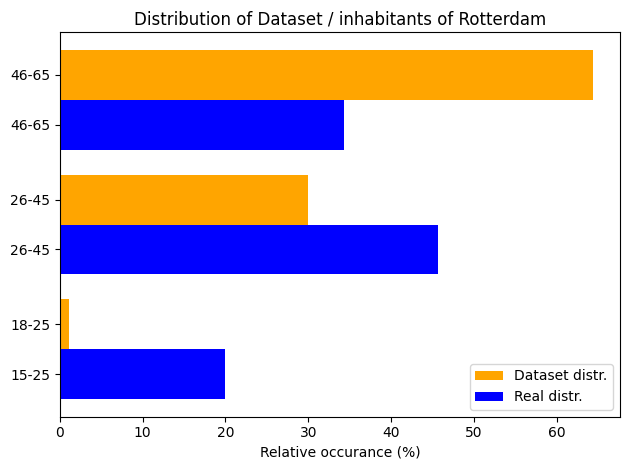

In [65]:
import itertools

y_pos = np.arange(3)
y_pos2 = np.arange(3)-0.4

plt.barh(y_pos, relative_freq, height=0.4, label='Dataset distr.', color='orange')

# Plot the second horizontal bar plot, slightly offset vertically
plt.barh(y_pos - 0.4, real_distr, height=0.4, label='Real distr.', color='blue')

labels = []
y_positions = []
for i in range(3):
    labels.append(age_labels[i])
    labels.append(real_distr_labels[i])
    y_positions.append(y_pos[i])
    y_positions.append(y_pos2[i])
print(labels)
print(y_positions)

plt.yticks(y_positions, np.array(labels))

plt.xlabel('Relative occurance (%)')
plt.title('Distribution of Dataset / inhabitants of Rotterdam')

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

